In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def readpgm(name):
    with open(name) as f:
         lines = f.readlines()

    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)

    assert lines[0].strip() == 'P2' 

    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])

    return (np.array(data[3:]),(data[1],data[0]),data[2])

data = readpgm('lena256_PGM.pgm')
img_data = np.reshape(data[0],data[1])

data2 = readpgm('lena256 with block 2.pgm')
img_data2 = np.reshape(data2[0],data2[1])

In [17]:
def subtract2imgs(image1, image2):
    
    img1 = image1
    img2 = image2
    
    if img1.shape == img2.shape:
        subtraction = img1 - img2
        return subtraction
    
    else:
        print("2 images of different sizes")
        return None

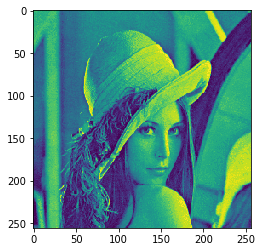

In [18]:
plt.imshow(img_data)

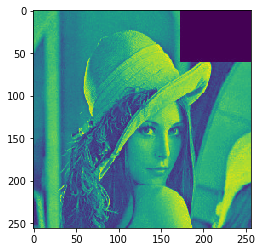

In [19]:
plt.imshow(img_data2)

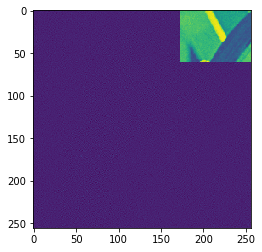

In [20]:
image1 = img_data
image2 = img_data2
output = subtract2imgs(image1, image2)
plt.imshow(output)

In [21]:
width = img_data.shape[0]
height = img_data.shape[1]
arr = output

filename = 'lena_output_subtract.pgm'
fout=open(filename, 'wb')

pgmHeader = 'P2' + ' ' + str(width) + ' ' + str(height) + ' ' + str(255) +  '\n'

pgmHeader_byte = bytearray(pgmHeader,'utf-8')

fout.write(pgmHeader_byte)

img = np.reshape(arr,(height,width))

for j in range(height):
    bnd = list(img[j,:])
    bnd_str = np.char.mod('%d',bnd)
    bnd_str = np.append(bnd_str,'\n')
    bnd_str = [' '.join(bnd_str)][0]    
    bnd_byte = bytearray(bnd_str,'utf-8')        
    fout.write(bnd_byte)

fout.close()